In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Loading the dataset
df = pd.read_csv("D:\heart.csv")
df


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression Induced by Exercise,Slope of the Peak Exercise ST Segment,Number of Major Vessels Colored by Fluoroscopy,Thallium Stress Test Result,Diagnosis of Heart Disease,Heart Disease Type
0,42,0,0,103,246,1,0,147,1,1.418300,2,3,1,0,No
1,78,1,0,164,323,1,1,170,0,1.566190,1,3,0,1,Heart Failure
2,40,1,0,197,212,0,1,136,1,4.282330,0,3,1,1,Myocarditis
3,22,0,2,121,306,0,1,147,1,1.431177,2,3,2,1,Cardiomyopathy
4,57,1,1,134,284,0,2,219,1,2.717498,1,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,65,1,3,120,230,0,2,184,0,3.970895,0,3,2,0,No
9996,58,1,0,180,295,1,0,120,0,2.650137,0,3,1,0,No
9997,75,0,2,91,100,1,1,217,0,4.471365,2,0,2,0,No
9998,28,1,1,103,251,1,2,119,1,0.502705,1,2,0,1,Heart Attack


C:\Users\sanje\AppData\Local\Temp\ipykernel_16748\1316943620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Heart Disease Type'], y=df['Age'], palette="coolwarm")


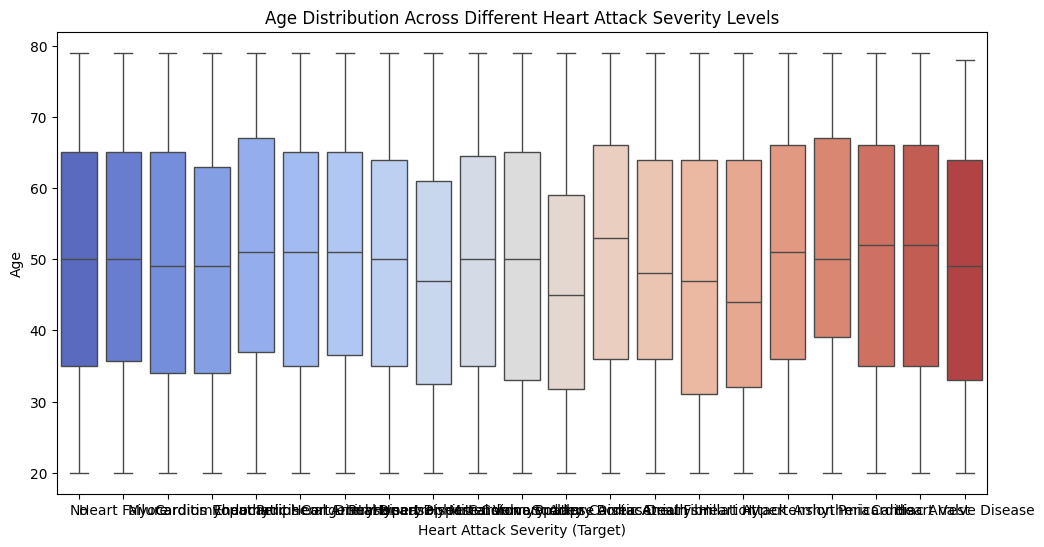

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Heart Disease Type'], y=df['Age'], palette="coolwarm")
plt.title("Age Distribution Across Different Heart Attack Severity Levels")
plt.xlabel("Heart Attack Severity (Target)")
plt.ylabel("Age")
plt.show()


In [4]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Heart Disease Type'])  # Features (all except target)
y = df['Heart Disease Type']  # Target variable


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now split the encoded target
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


C:\Users\sanje\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [10]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_resampled, y_resampled)  # Train on balanced data


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
# Predict on test data
y_pred = model.predict(X_test)

# Print full prediction array
print("Predicted values:\n", y_pred)


Predicted values:
 [15 15 15 ... 15  0  9]


In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5330
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.02      0.02        48
           1       0.14      0.13      0.13        46
           2       0.02      0.02      0.02        46
           3       0.06      0.06      0.06        53
           4       0.06      0.06      0.06        52
           5       0.15      0.10      0.12        49
           6       0.06      0.06      0.06        54
           7       0.10      0.15      0.12        47
           8       0.02      0.02      0.02        51
           9       0.00      0.00      0.00        43
          10       0.03      0.04      0.04        50
          11       0.07      0.06      0.07        48
          12       0.04      0.04      0.04        56
          13       0.07      0.06      0.07        48
          14       0.06      0.06      0.06        49
          15       1.00      1.00      1.00      1012
          16       0.05      0.06      0